<li>Lineer Regresyon</li>
<li>Gradient Descent ile(Batch)</li>
<li>Vectorization</li>

In [1]:
from sklearn.metrics import mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
def loss_hesapla(thetas,X,Y):
    return np.sum(((X.dot(thetas.T)-Y)**2)/(2*X.shape[0]))

In [3]:
def gradient_descent(thetas,X,Y,lr=0.001):
    thetas -= (2*(X.dot(thetas.T)-Y).T.dot(X)*lr)/X.shape[0]

In [4]:
veriler = pd.read_csv(r"datas/veriler.csv")
veriler.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [5]:
ss = StandardScaler()

boy = ss.fit_transform(veriler[["boy"]])
kilo = ss.fit_transform(veriler[["kilo"]])
girdiler = np.concatenate([boy,kilo],axis=1)

ohe = OneHotEncoder()
ulkeler_ohe = ohe.fit_transform(veriler[["ulke"]]).toarray()

cinsiyet_ohe = ohe.fit_transform(veriler[["cinsiyet"]]).toarray()[:,0]
cinsiyet_ohe = cinsiyet_ohe.reshape(cinsiyet_ohe.shape[0],1)

In [6]:
girdiler = np.concatenate([np.ones((girdiler.shape[0],1)),girdiler,ulkeler_ohe,cinsiyet_ohe],axis=1)

In [7]:
cikti = veriler["yas"].values
cikti = cikti.reshape((cikti.shape[0],1))

In [8]:
thetas = np.ones((1,girdiler.shape[1]))
#thetas = np.random.rand(1,(girdiler.shape[1]))
thetas.shape

(1, 7)

In [9]:
iterasyon = 2500
loss_list = list()

In [10]:
for i in range(iterasyon):
    gradient_descent(thetas,girdiler,cikti,lr=0.001)
    loss_list.append(loss_hesapla(thetas,girdiler,cikti))
    if(i%250 == 0 or i==iterasyon-1):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla(thetas,girdiler,cikti)))

1.iterasyon, Loss = 413.2471406111083
251.iterasyon, Loss = 145.32813593140094
501.iterasyon, Loss = 82.2041147545256
751.iterasyon, Loss = 61.24234503232587
1001.iterasyon, Loss = 51.060506288877086
1251.iterasyon, Loss = 44.8701631043429
1501.iterasyon, Loss = 40.769814782230014
1751.iterasyon, Loss = 37.977407843888656
2001.iterasyon, Loss = 36.057047809671154
2251.iterasyon, Loss = 34.729634714346226
2500.iterasyon, Loss = 33.81099156915619


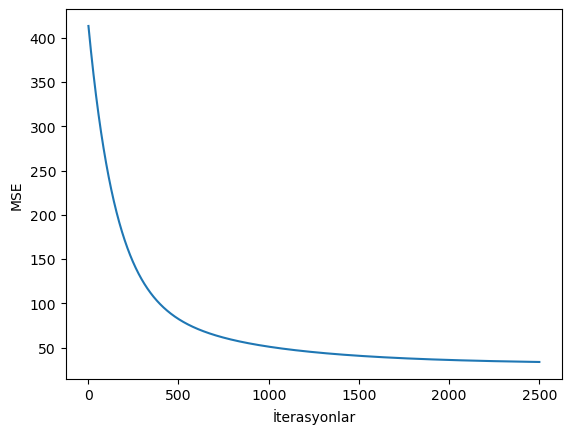

In [11]:
plt.plot(range(1,len(loss_list)+1),loss_list)
plt.xlabel("İterasyonlar")
plt.ylabel("MSE")
plt.show()

In [12]:
indis = 11

In [13]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas.T)))

Gercek = [44], Tahmin = [34.81180962]


In [14]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas.T))))

MAE = 6.842071254688579


## Normal Equation

In [15]:
thetas_norm_eq = np.linalg.pinv(girdiler.T.dot(girdiler)).dot(girdiler.T).dot(cikti)

In [16]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas_norm_eq)))

Gercek = [44], Tahmin = [37.50586643]


In [17]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas_norm_eq))))

MAE = 6.068537308508868


## Reguralizasyon ile Lineer Regresyon

In [18]:
reguralizasyon_degeri = 0.001

In [19]:
def loss_hesapla_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri):
    temp = thetas.copy()
    temp[0,0] = 0.0
    return (np.sum(((X.dot(thetas.T)-Y)**2))+reg_katsayi*np.sum(temp**2))/(2*X.shape[0])

In [20]:
def gradient_descent_reg(thetas,X,Y,reg_katsayi=reguralizasyon_degeri,lr=reguralizasyon_degeri):
    temp = thetas[0,0:1]*lr*reg_katsayi/X.shape[0]
    thetas = thetas*(1-lr*reg_katsayi/X.shape[0]) - (2*(X.dot(thetas.T)-Y).T.dot(X)*lr)/X.shape[0]
    thetas[0,0:1] += temp
    return thetas

In [21]:
thetas = np.ones((1,girdiler.shape[1]))
#thetas = np.random.rand(1,(girdiler.shape[1]))
thetas.shape

(1, 7)

In [22]:
iterasyon = 2500
loss_list = list()

In [23]:
for i in range(iterasyon):
    thetas = gradient_descent_reg(thetas,girdiler,cikti,lr=0.001)
    loss_list.append(loss_hesapla_reg(thetas,girdiler,cikti))
    if(i%250 == 0 or i==iterasyon-1):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla_reg(thetas,girdiler,cikti)))

1.iterasyon, Loss = 413.24728310716085
251.iterasyon, Loss = 145.33032209732434
501.iterasyon, Loss = 82.20765301555728
751.iterasyon, Loss = 61.24671764625221
1001.iterasyon, Loss = 51.06554153219226
1251.iterasyon, Loss = 44.87578890698757
1501.iterasyon, Loss = 40.77597035637404
1751.iterasyon, Loss = 37.98402744000836
2001.iterasyon, Loss = 36.06406352775199
2251.iterasyon, Loss = 34.736981488018515
2500.iterasyon, Loss = 33.81860951504279


In [24]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas.T))))

MAE = 6.842146559127764


## Reguralizasyon ile Normal Equation

In [25]:
reguralizasyon_degeri = 0.001
indis = 6

In [26]:
reg_matrix = np.eye(girdiler.shape[1])
reg_matrix[0,0] = 0.
reg_matrix

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

In [27]:
thetas_norm_eq = np.linalg.pinv(girdiler.T.dot(girdiler)+reg_matrix*reguralizasyon_degeri).dot(girdiler.T).dot(cikti)

In [28]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],girdiler[indis].dot(thetas_norm_eq)))

Gercek = [25], Tahmin = [23.99283693]


In [29]:
print("MAE = {}".format(mean_absolute_error(cikti,girdiler.dot(thetas_norm_eq))))

MAE = 6.06851536506745


# Tek değişkenli Lineer Regresyon Surface ve Contour Grafikleri Çizdirme

In [30]:
X = ss.fit_transform(veriler[["boy"]])
X = np.concatenate([np.ones((X.shape[0],1)),X],axis=1)

In [31]:
#thetas = np.ones((1,X.shape[1]))
#thetas = np.array([[60,20]])
thetas = np.random.rand(1,(X.shape[1]))
thetas.shape

(1, 2)

In [32]:
iterasyon = 2500
loss_list = list()
thetas_list = list()

In [33]:
for i in range(iterasyon):
    thetas = gradient_descent_reg(thetas,X,cikti,lr=0.001)
    if(i%250 == 0 or i==iterasyon-1):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla_reg(thetas,X,cikti)))
        loss_list.append(loss_hesapla_reg(thetas,X,cikti))
        thetas_list.append(thetas[0])

1.iterasyon, Loss = 465.7396830327854
251.iterasyon, Loss = 208.91242252795425
501.iterasyon, Loss = 114.5256873291743
751.iterasyon, Loss = 79.83758305930637
1001.iterasyon, Loss = 67.08935669457571
1251.iterasyon, Loss = 62.4042627354932
1501.iterasyon, Loss = 60.682450649955875
1751.iterasyon, Loss = 60.049672611834495
2001.iterasyon, Loss = 59.81712382799105
2251.iterasyon, Loss = 59.73166206514061
2500.iterasyon, Loss = 59.70032863350927


In [34]:
theta_0 = np.array([x[0] for x in thetas_list])
theta_1 = np.array([x[1] for x in thetas_list])
J_history = np.array(loss_list)

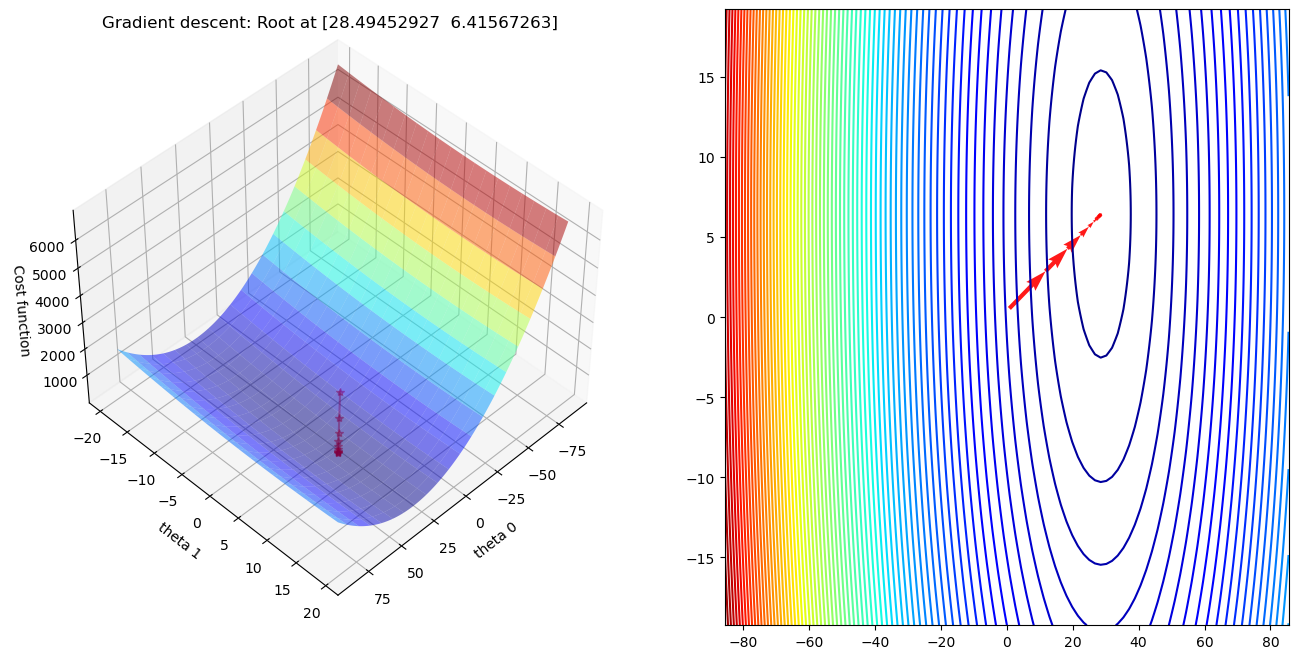

In [35]:
T0, T1 = np.meshgrid(np.linspace(thetas[0,0]*-3,thetas[0,0]*3,100),
                     np.linspace(thetas[0,1]*-3,thetas[0,1]*3,100))
z_temp = np.array([loss_hesapla(np.array([[t0,t1]]),X,cikti) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
Z = z_temp.reshape(T0.shape)

anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(thetas.ravel()))
ax.view_init(45, 45)

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()